### **Quick Tutorial - Model Explainability for Residential Appraisers**
### **SHAP (SHapley Additive exPlanations)**

&nbsp;  
For this quick tutorial we will be using a dataset of home sales that includes sales prices and several predicting features, in csv format ***(Already pre-processed from [Intro to Machine Learning for Residential Appraisers, Part 1](https://github.com/AngeloDSML/Home_Valuation_Part_1))***. 



### **IMPORT LIBRARIES**

#### First, we need to import the libraries we are going to be using.

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install shap
import shap


     |████████████████████████████████| 356 kB 4.2 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491641 sha256=a066ab3ffdb049e0e77ee37743fceffe4842650b278b6698411482f891a42f64
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


### **IMPORT DATASET**

#### Next, we import the homes sales dataset to our notebook. ***(Already pre-processed from [Intro to Machine Learning for Residential Appraisers, Part 1](https://github.com/AngeloDSML/Home_Valuation_Part_1))*** 




In [ ]:
file_path = '/content/Sales_Dataset2.csv'       #Create file path to csv dataset
sales_df = pd.read_csv(file_path)               #Read dataset and assign the name sales_df
sales_df.head()                                 #Display data (first 5 rows) to make sure it was successfully imported

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool,Sales_Price
0,8549,1,5,5,4.0,4439,3,0,1,675000
1,11108,0,3,5,4.0,4069,3,0,0,540000
2,9920,0,22,5,4.0,3834,3,1,1,515000
3,10035,1,22,5,4.0,3828,3,1,1,495000
4,9600,1,14,5,4.0,3382,3,0,1,494700


&nbsp;
####Since we already covered the data pre-processing steps in previous tutorials, we will jump right into data modeling and predictions.

#### **MODEL**

#### First, we import the libraries we are going to be using.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import xgboost
from xgboost import XGBRegressor


&nbsp;  
#### Before running our models we must define the predicting features (Site, View, Age, Bedrooms, Bathrooms, GLA, Garage, Fireplace, and Pool) as 'X' and the target feature (Sales Prices) as 'y'.

In [ ]:
X = sales_df.iloc[:,:-1]      #Define predicting features, X
y = sales_df.iloc[:,-1]       #Define target, y

&nbsp;  
&nbsp;  
#### Next, we split the dataframe in two sets. The train set (to train the model) and the test set (to test the model with new data).
#### We assign 80% of the data to the train set and 20% to the test set. (Other common combinations are 75/25, 85/15, and 90/10).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.2, random_state=0)     #train-test split


#### The next step is to define the model and fit the train set.

####**MODEL: Extreme Gradient Boosting (XGBoost)**

#### Let's define the model and fit the train set.

In [ ]:
xg_boost = XGBRegressor()             #Define the model
 
xg_boost.fit(X_train,y_train)         #Fit the train set

[16:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

&nbsp;  
&nbsp;  
#### We just created the Extreme Gradient Boosting model. Now we want to know how well it performs with new data (test set). We will use "Mean Absolute Error" (MAE) to score the model.

In [ ]:
xgb_pred = xg_boost.predict(X_test)                 #Get predictions using the test set

xgb_mae = mean_absolute_error(xgb_pred,y_test)      #Calculate MAE

print("XGBoost MAE:", format(xgb_mae, ',.2f'))      #Display MAE score


XGBoost MAE: 20,499.71


#### The Mean Absoulte Error (MAE) is 20,499.17

&nbsp;  
&nbsp;  
#### Next, we will run the trained model using the subject property data.

#### **PREDICTIONS**

#### Import a csv file that contains the subject's information in the same format as the cleaned dataframe. The only missing feature is the "Sales Price" since that is the target we are trying to predict.

In [ ]:
sp_data_path = '/content/SP_Data2.csv'          #Create file path to csv dataset 
sp_data = pd.read_csv(sp_data_path)             #Read dataset in dataframe

sp_data.head()                                  #Display data (first 5 rows) just to make sure it was successfully imported

,Site,View,Age,Bedrooms,Bathrooms,GLA,Garage,Fireplace,Pool
0,12100,0,16,4,3,2915,3,0,1


&nbsp;
&nbsp;  
#### Now we define the predicting features and then we are run the trained models to predict the subject's estimated value.

In [1]:
features = ['Site', 'View', 'Age', 'Bedrooms', 'Bathrooms', 'GLA','Garage','Fireplace','Pool']    #Define predicting features
sp_X = sp_data[features]

prediction_xgboost = int(xg_boost.predict(sp_X))                      #Predict the subject's value using Extreme Gradient Boosting model

print('Estimated Value')                                              #Display estimated value
print()
print('$', format(prediction_xgboost,','))

NameError: ignored

&nbsp;
&nbsp; 
### **MODEL EXPLAINABILITY USING *SHAP* VALUES**

In [ ]:
explainer_sp = shap.TreeExplainer(xg_boost)           #Create explainer to calculate shap values

shap_values_sp = explainer_sp.shap_values(sp_X)       #Calculate Shap values

&nbsp;
### **Now that we calculated SHAP values, we can use visualizations to understand the model prediction.** 

### The first visualization is a **summary bar plot** showing feature importance.

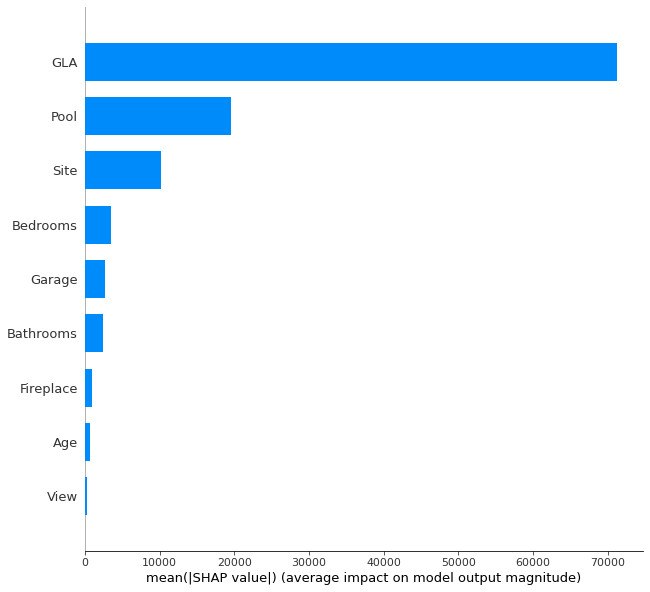

In [ ]:
shap.summary_plot(shap_values_sp, sp_X, plot_type="bar", plot_size=(10, 10))  #Create Summary Plot using SHAP values


&nbsp;
### Next, we will use a **decision plot**. This type of plot shows the effects of each feature, and how they accumulate from the base value to arrive at the model’s prediction at the top of the plot.


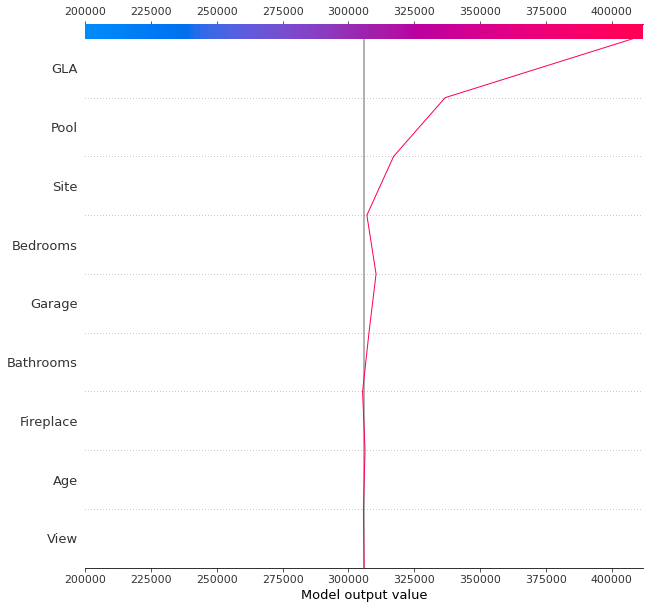

In [ ]:
shap.decision_plot(explainer_sp.expected_value, shap_values_sp, feature_names=list(features), show=False) #Create Decision Plot using SHAP values
fig = plt.gcf()
fig.set_figheight(10)
fig.set_figwidth(10)


&nbsp;
### The next visualization is a **waterfall plot**. This plot displays the contribution of each feature to arrive to the final estimate of value (prediction). The bottom of the waterfall plot starts as the base value of the model output, and then each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the base model output to the model output for the subject property.


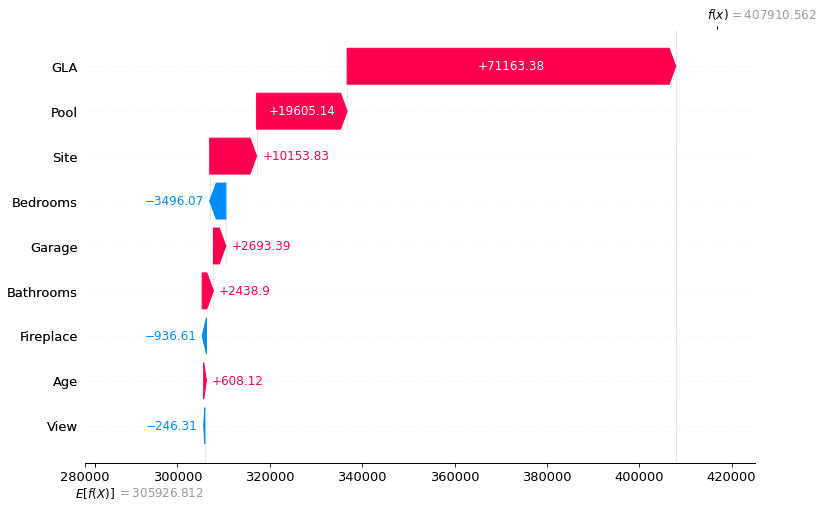

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer_sp.expected_value, shap_values_sp[0],feature_names = list(features), show=False) #Create Waterfall Plot using SHAP values
fig = plt.gcf()
fig.set_figheight(8)
fig.set_figwidth(12)
x_axis = fig.axes[0]
x_axis.set_xlim(280000,425000)
plt.show()

&nbsp;  
&nbsp;
### **Additional Resources**
SHAP documentation: https://shap.readthedocs.io/en/latest/index.html
